<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/tanimoto_article3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

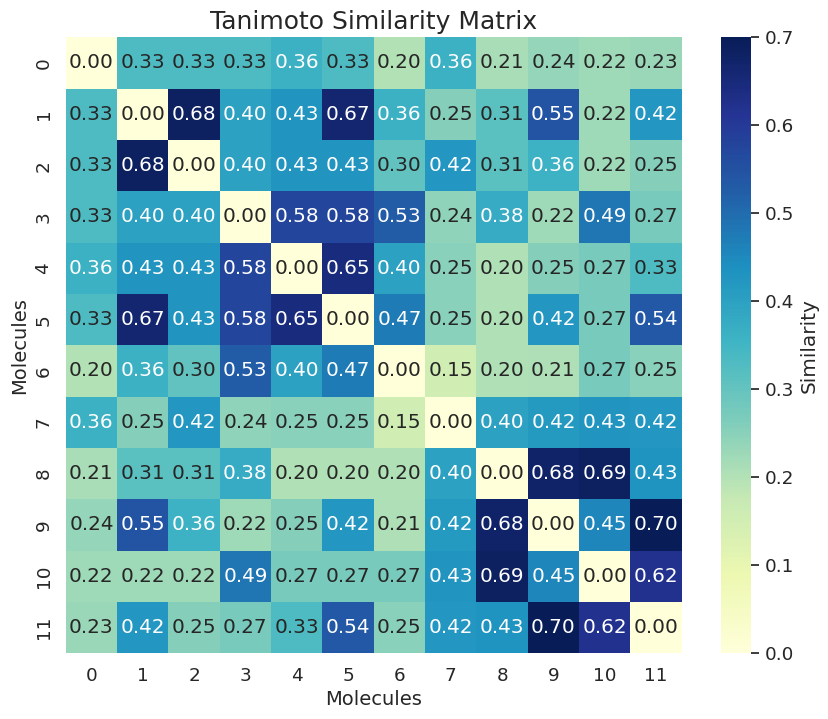

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo csv
url= "https://raw.githubusercontent.com/jisusP/Articulo/main/SMILES.csv"
sm=pd.read_csv(url)

# Calcular los índices de Tanimoto para cada par de moléculas
fps = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi),2,nBits=1024) for smi in sm['smiles']]
tanimoto = []
for i in range(len(fps)):
    for j in range(i+1, len(fps)):
        similarity = DataStructs.TanimotoSimilarity(fps[i],fps[j])
        tanimoto.append(similarity)

# Construir la matriz de similitud
n = len(sm)
similarity_matrix = np.zeros((n,n))
count = 0
for i in range(n):
    for j in range(i+1, n):
        similarity_matrix[i,j] = tanimoto[count]
        similarity_matrix[j,i] = tanimoto[count]
        count += 1

# Visualizar la matriz de similitud en un heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(similarity_matrix, cmap="YlGnBu", annot=True, square=True, fmt='.2f', cbar_kws={'label': 'Similarity'})
plt.title('Tanimoto Similarity Matrix', fontsize=18)
plt.xlabel('Molecules', fontsize=14)
plt.ylabel('Molecules', fontsize=14)
plt.show()


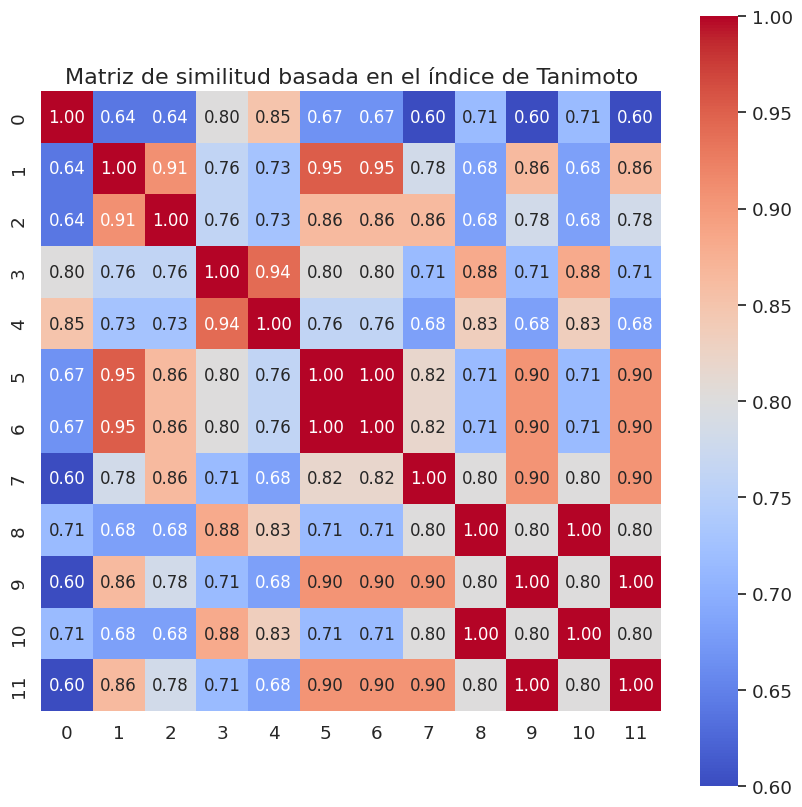

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos
url= "https://raw.githubusercontent.com/jisusP/Articulo/main/SMILES.csv"
sm=pd.read_csv(url)
smile_alone = sm.loc[:,"smiles"]
mkeys = []
def tanimoto(s):
  mol = Chem.MolFromSmiles(s)
  mkeys = MACCSkeys.GenMACCSKeys(mol)
  return mkeys
for i in smile_alone:
  mkeys.append(tanimoto(i))
sm = sm.assign(Mkeys=mkeys)

# Construcción de matriz de similitud
tan_sim = np.zeros((len(sm), len(sm)))
for i, k in enumerate(sm['Mkeys']):
    for j, l in enumerate(sm['Mkeys']):
        tan_sim[i,j] = np.sum(k & l) / np.sum(k | l)

# Cambio de la diagonal a 1
np.fill_diagonal(tan_sim, 1)

# Creación del heatmap
df_tan = pd.DataFrame(tan_sim)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_tan, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Matriz de similitud basada en el índice de Tanimoto', size=16)
plt.show()
